In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr


In [3]:
df = pd.read_csv('Wholesale customers data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


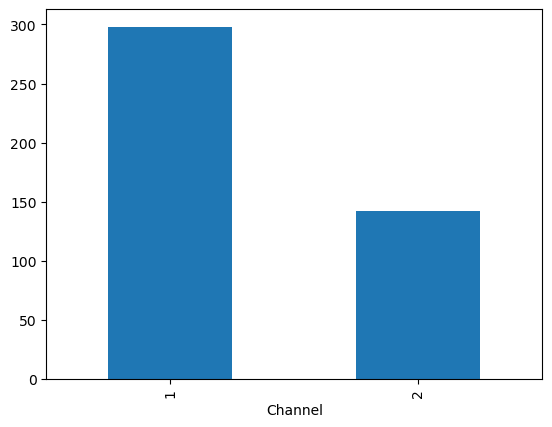

In [5]:
df["Channel"].value_counts().plot(kind = "bar");

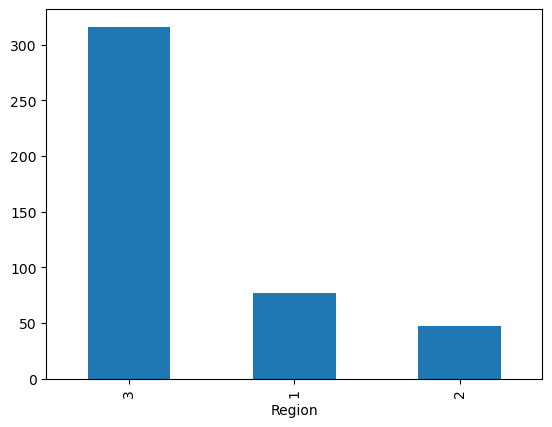

In [6]:
df["Region"].value_counts().plot(kind = "bar");

In [7]:
df['Channel'] = df['Channel'].map({1:"Horeca",2:"Retail"})
df['Region'] = df['Region'].map({1:"Lisbon",2:"Porto",3:"Others"})

In [8]:
df["Region"].value_counts(normalize =True)

Region
Others    0.718182
Lisbon    0.175000
Porto     0.106818
Name: proportion, dtype: float64

In [9]:
features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [10]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


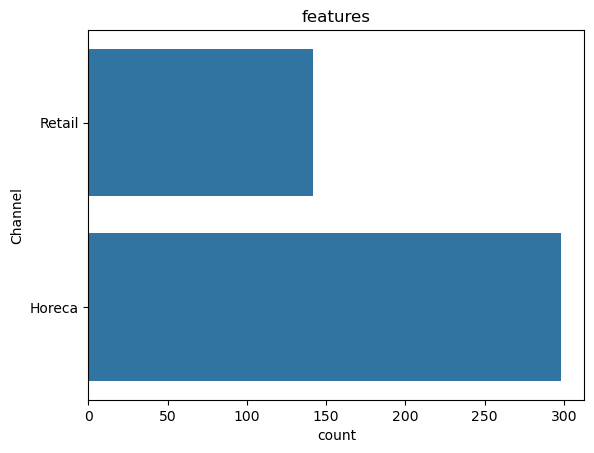

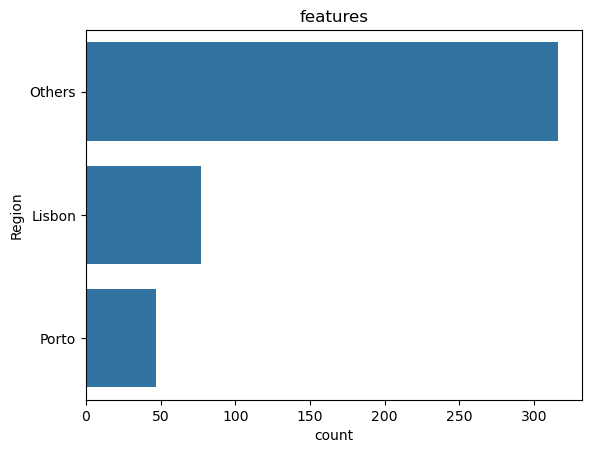

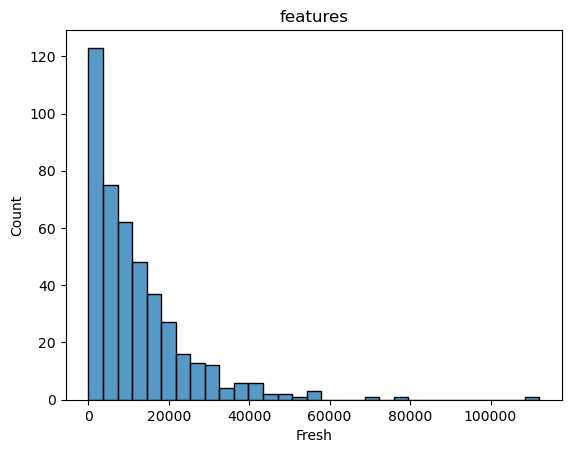

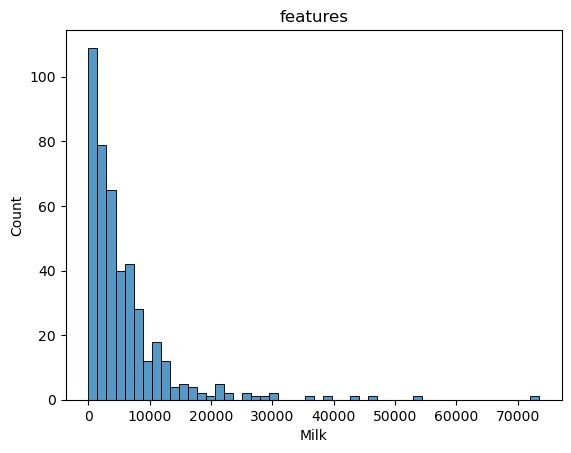

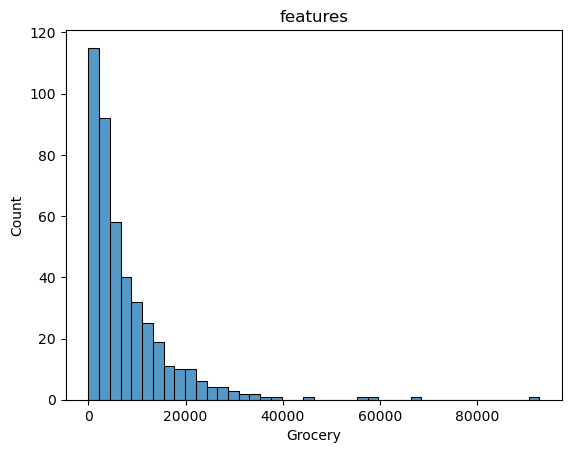

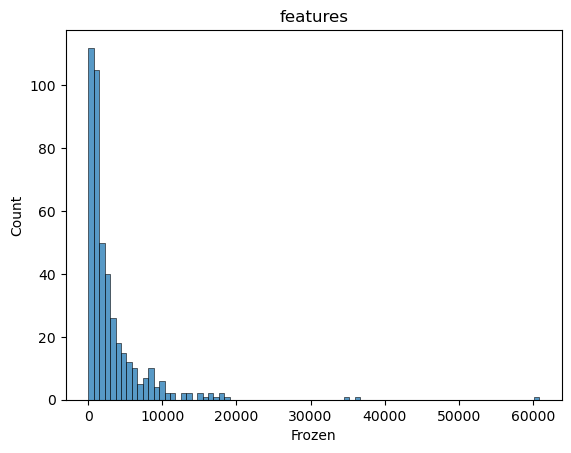

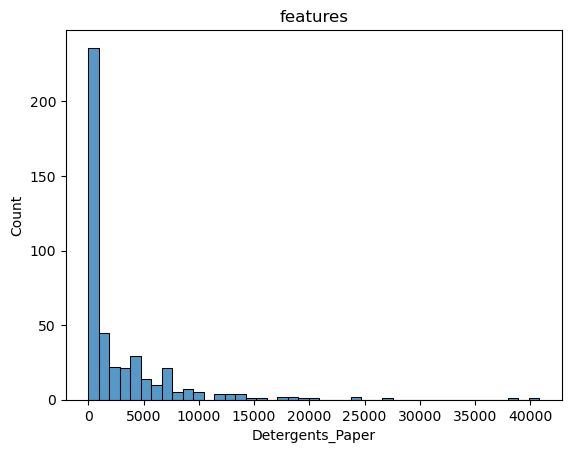

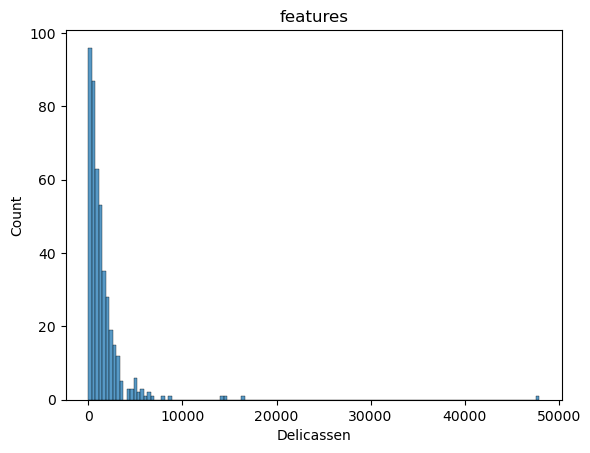

In [14]:
for feature in features:
    if feature == "Channel" or feature == "Region":
        sns.countplot(df[feature]).set_title("features")
        plt.show()
    else:
        sns.histplot(df[feature]).set_title("features")
        plt.show()

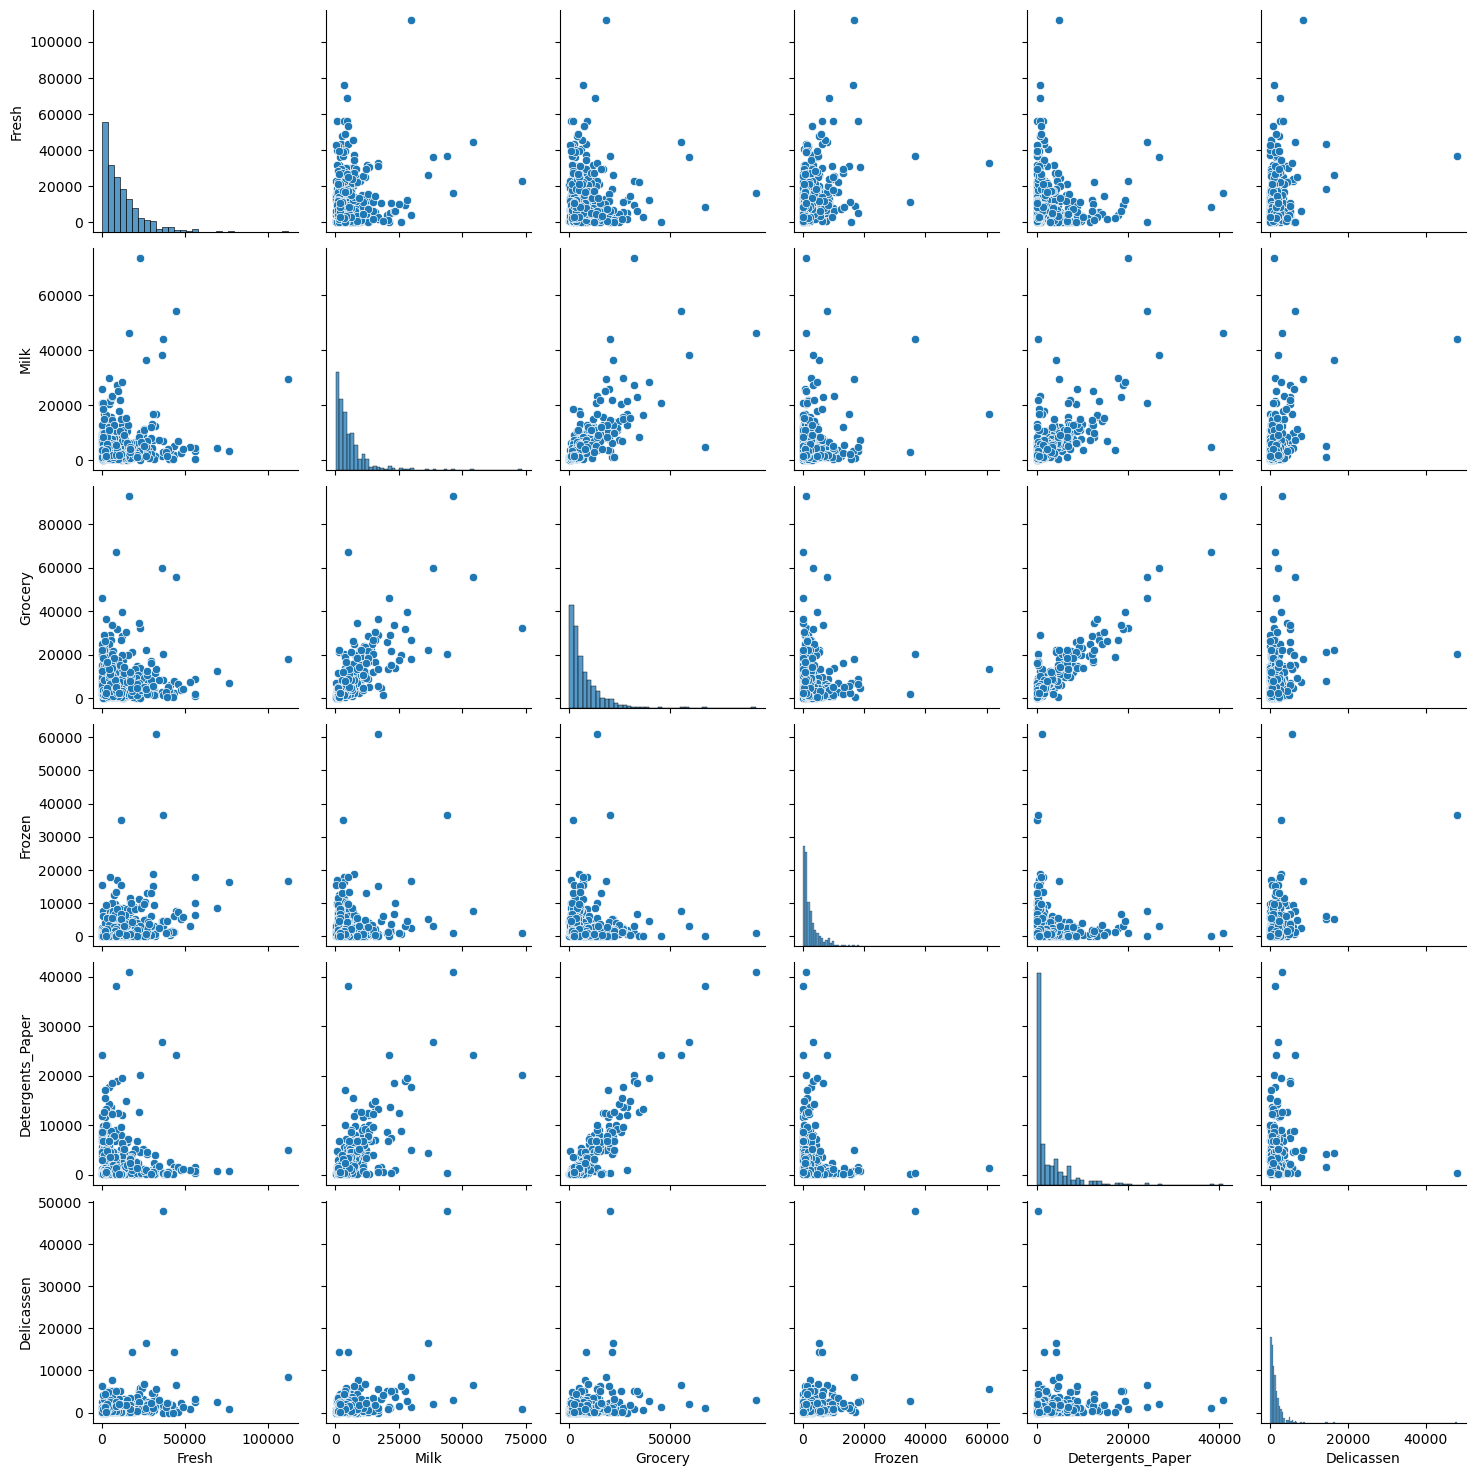

In [15]:
sns.pairplot(df)

In [16]:
data = df.drop(["Region","Channel"],axis = 1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [17]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

In [18]:
new_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [19]:
pca = PCA(n_components = 2)
rpc = pca.fit_transform(new_data)
rpc

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

In [20]:
kpca = KernelPCA(n_components = 2,kernel ='rbf')
dt = kpca.fit_transform(new_data)

In [21]:
dt

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

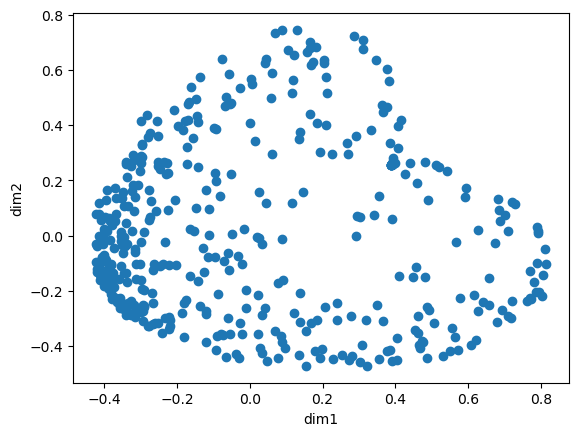

In [22]:
plt.scatter(dt[:,0],dt[:,1])
plt.xlabel("dim1")
plt.ylabel("dim2")
plt.show()

In [23]:
df["xkpca"] = dt[:,0]
df["ykpca"] = dt[:,1]

In [24]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,xkpca,ykpca
0,Retail,Others,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Others,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Others,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,Horeca,Others,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Others,22615,5410,7198,3915,1777,5185,0.136617,0.375279


In [25]:
pip install yellowbrick

In [26]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\DIARY\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\DIARY\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\DIARY\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DIARY\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^

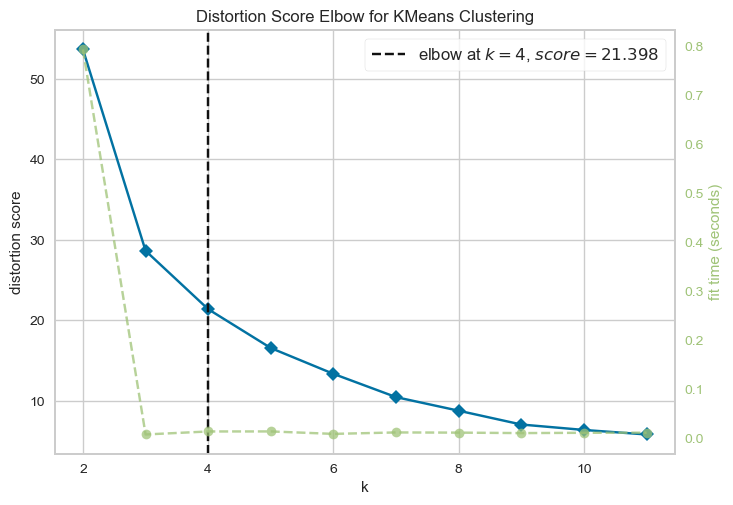

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans()
vis = KElbowVisualizer(kmeans,k=(2,12))
vis.fit(dt)
vis.show()

In [28]:
cluster = KMeans(n_clusters = 5)
cluster.fit(dt)
new_clus = cluster.predict(dt)

C:\Users\DIARY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


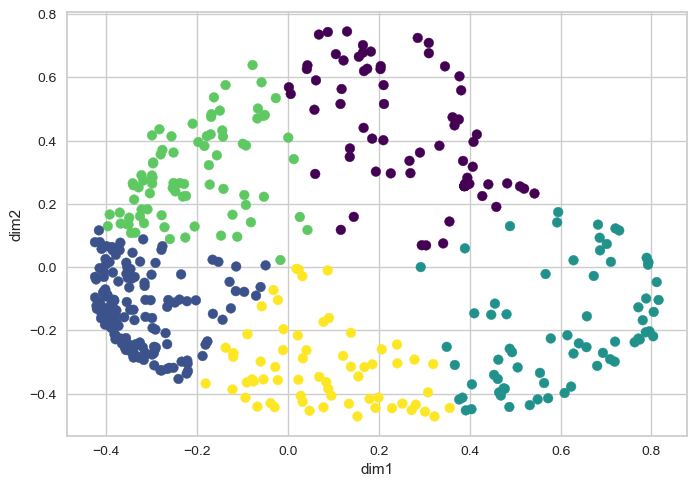

In [29]:
plt.scatter(dt[:,0],dt[:,1],c = new_clus,cmap='viridis')
plt.xlabel("dim1")
plt.ylabel("dim2")
plt.show()

In [30]:
df["clusters"] = new_clus

In [31]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,xkpca,ykpca,clusters
0,Retail,Others,12669,9656,7561,214,2674,1338,0.078374,-0.173115,4
1,Retail,Others,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,4
2,Retail,Others,6353,8808,7684,2405,3516,7844,0.341702,0.075048,0
3,Horeca,Others,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,Retail,Others,22615,5410,7198,3915,1777,5185,0.136617,0.375279,0


In [32]:
df.groupby("clusters")[[features[2],features[3],features[4],features[5],features[6],features[7]]].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
clusters,,,,,,
0,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
1,6487.745098,2234.000000,2804.973856,1752.339869,615.124183,839.084967
2,5361.828571,11311.314286,18649.557143,1366.828571,8235.042857,1509.342857
3,17619.512500,2376.750000,3190.412500,4286.500000,561.187500,1129.287500
4,5359.515625,6310.062500,8875.750000,1139.109375,3465.796875,1216.359375
